In [2]:
import os
import pandas as pd
import numpy as np
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import gaussian_kde

C:\Users\Predator\AppData\Local\Temp\ipykernel_34988\1382383916.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')


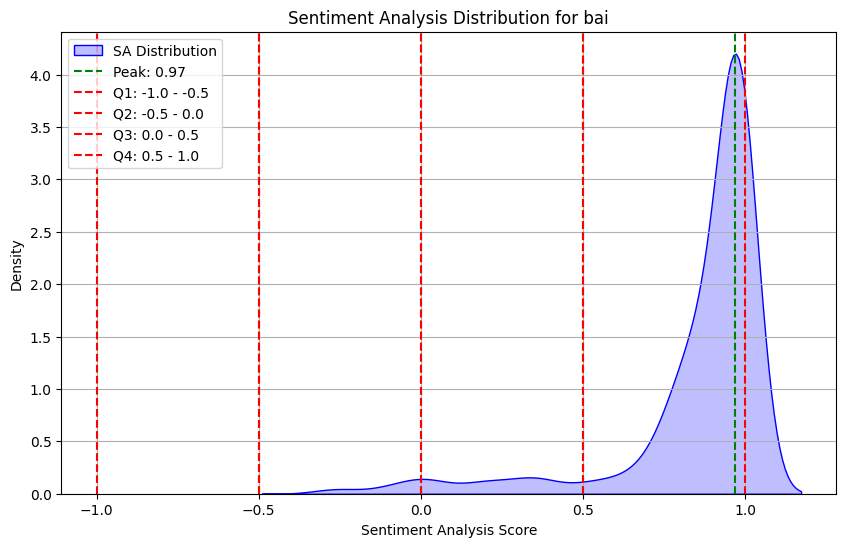

KS Statistic (Normal): 0.6367058068195416, P-value (Normal): 0.0
KS Statistic (Uniform): 0.6687035065784181, P-value (Uniform): 0.0


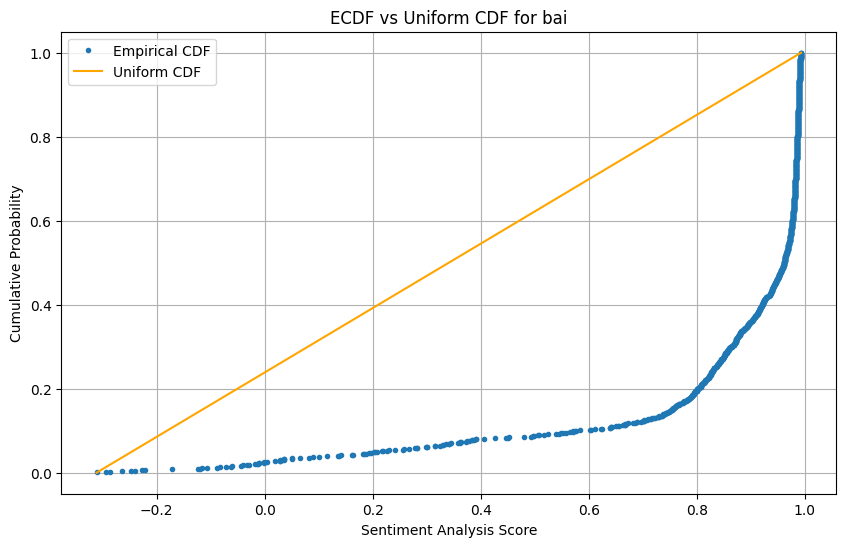

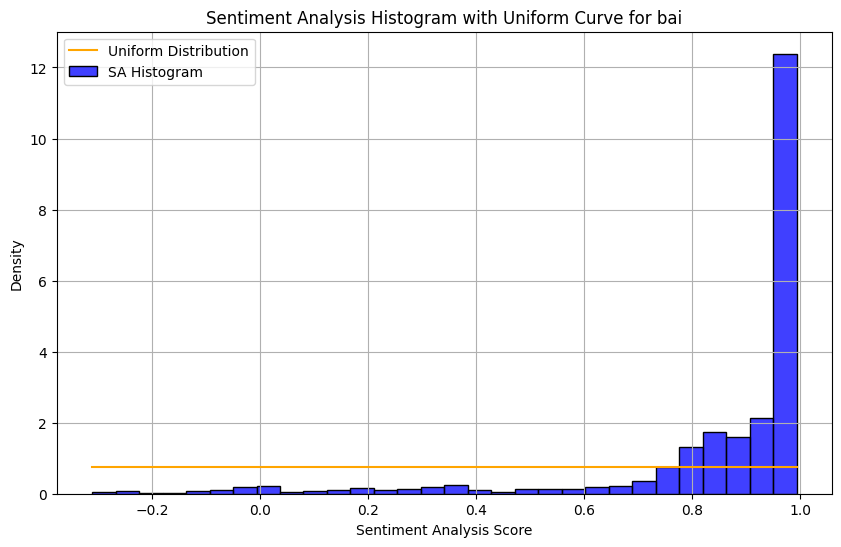

C:\Users\Predator\AppData\Local\Temp\ipykernel_34988\1382383916.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')


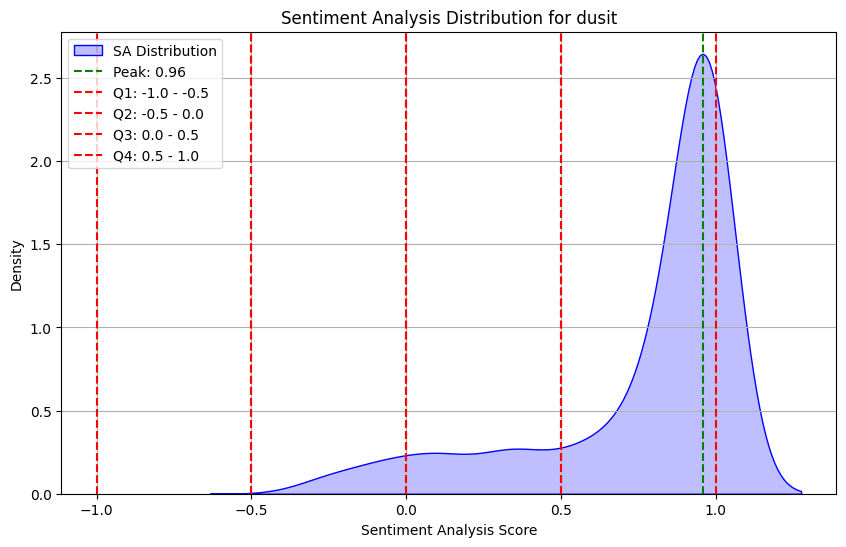

KS Statistic (Normal): 0.5177005851881956, P-value (Normal): 4.8580031341531474e-138
KS Statistic (Uniform): 0.5553562416843939, P-value (Uniform): 1.0861292315245102e-160


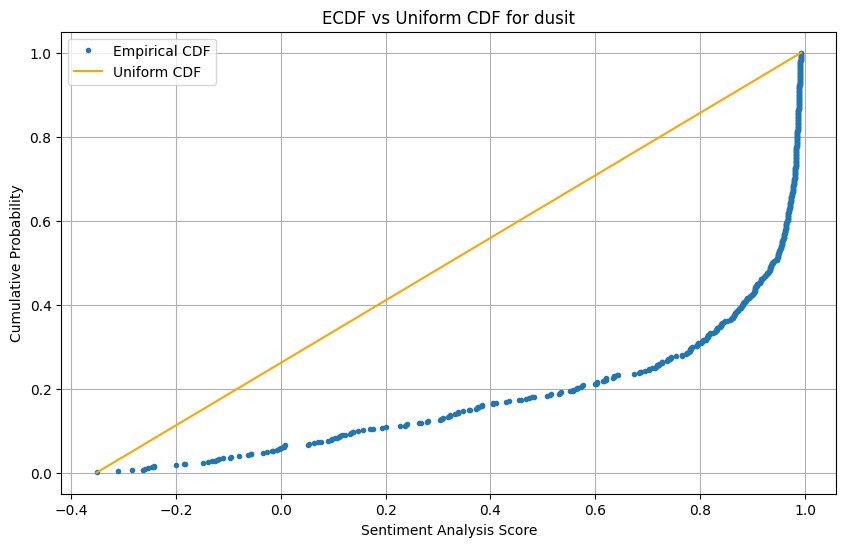

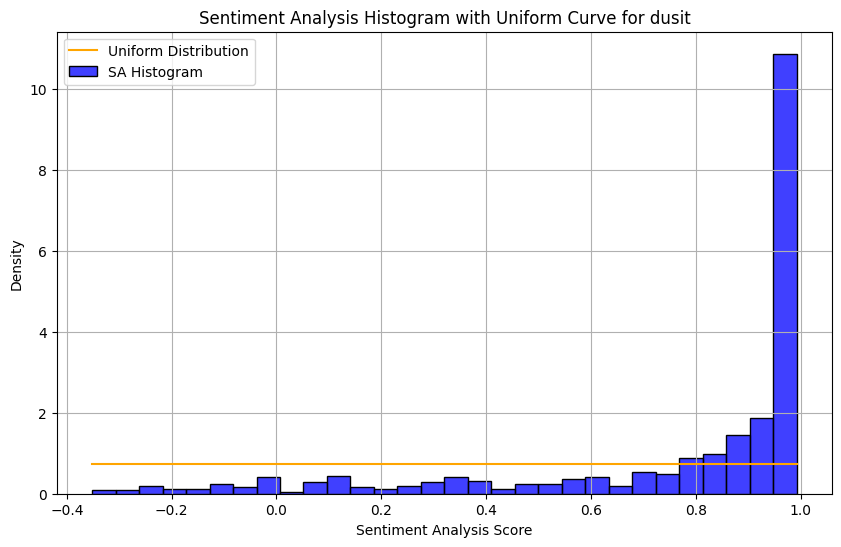

C:\Users\Predator\AppData\Local\Temp\ipykernel_34988\1382383916.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')


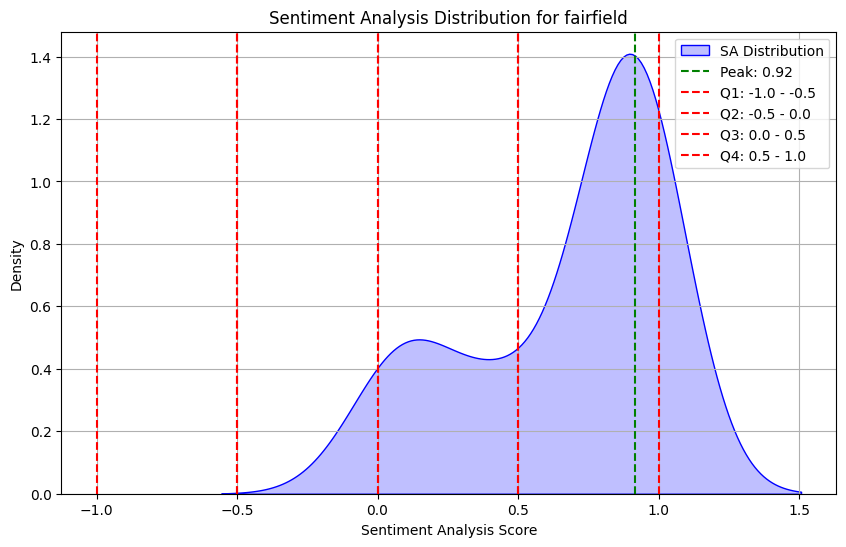

KS Statistic (Normal): 0.48440071601255363, P-value (Normal): 1.1854963200188019e-07
KS Statistic (Uniform): 0.4436880632467639, P-value (Uniform): 1.941403145604983e-06


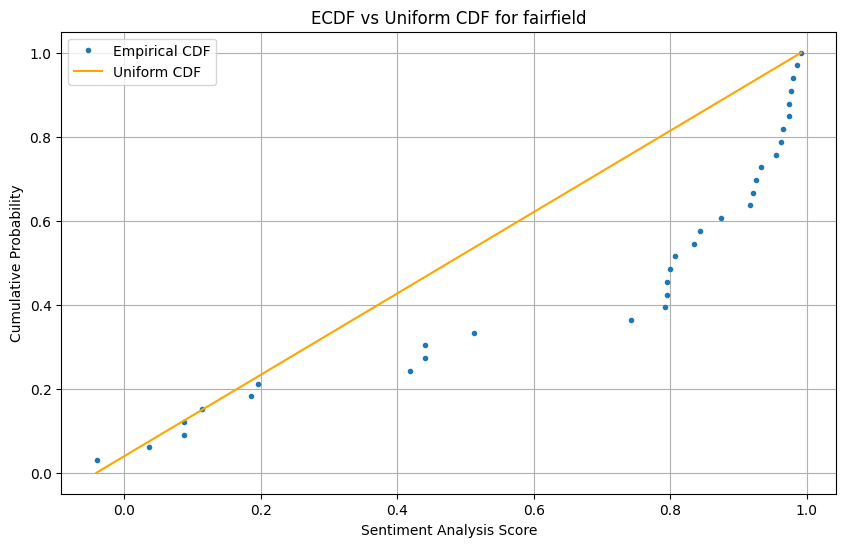

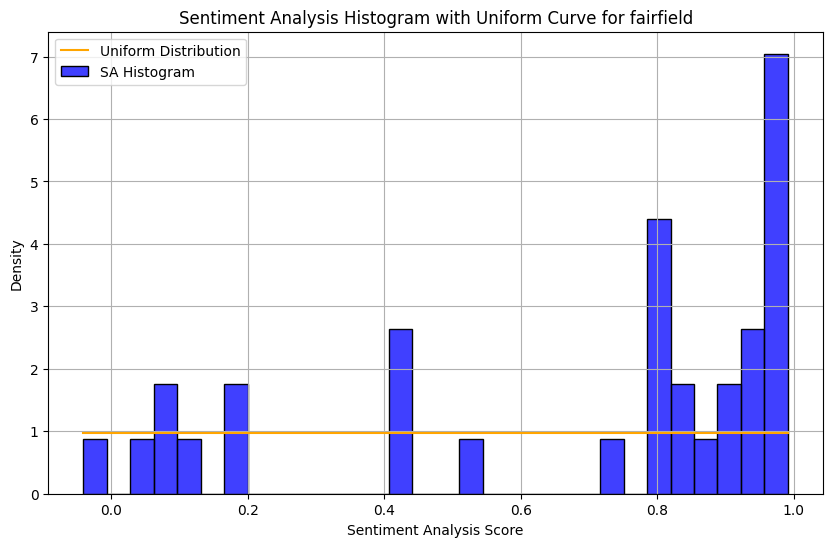

C:\Users\Predator\AppData\Local\Temp\ipykernel_34988\1382383916.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')


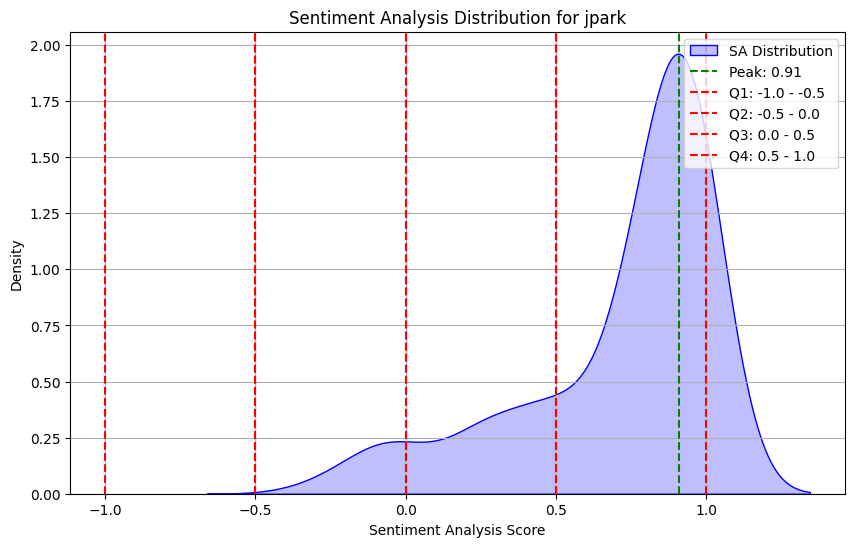

KS Statistic (Normal): 0.4907002052264955, P-value (Normal): 1.3011710628014152e-35
KS Statistic (Uniform): 0.4865835732301827, P-value (Uniform): 5.494850810201175e-35


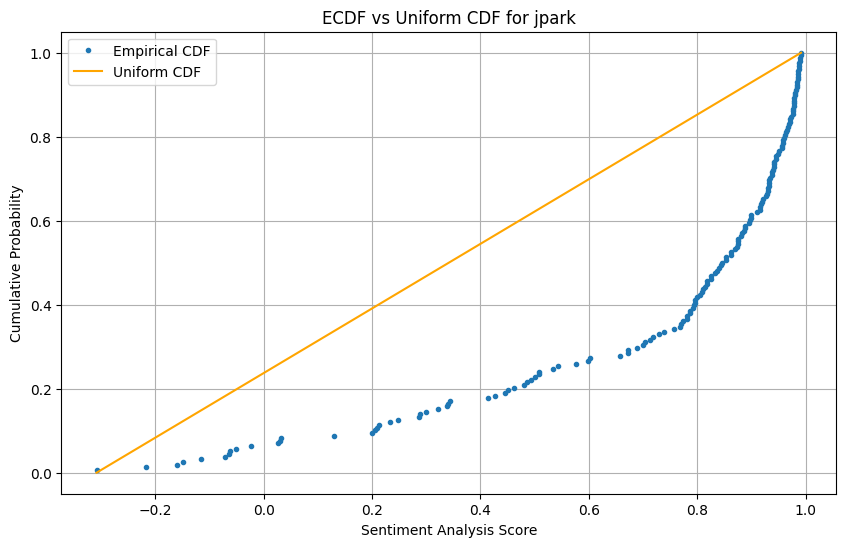

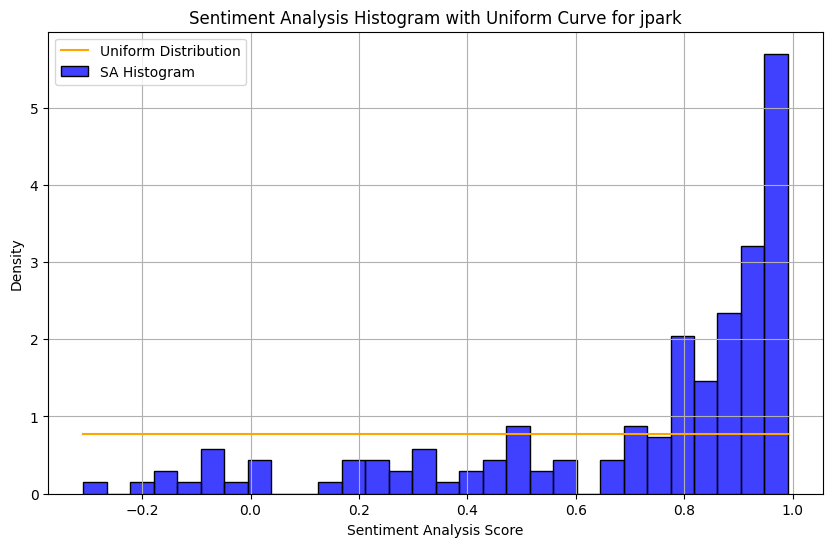

C:\Users\Predator\AppData\Local\Temp\ipykernel_34988\1382383916.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')


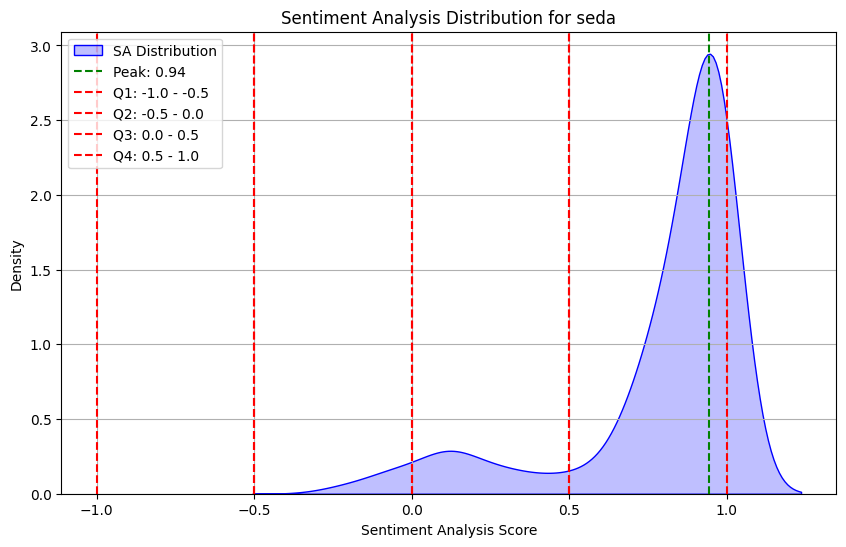

KS Statistic (Normal): 0.5812499679618032, P-value (Normal): 2.1124308016070492e-182
KS Statistic (Uniform): 0.583354982438708, P-value (Uniform): 7.28034190179917e-184


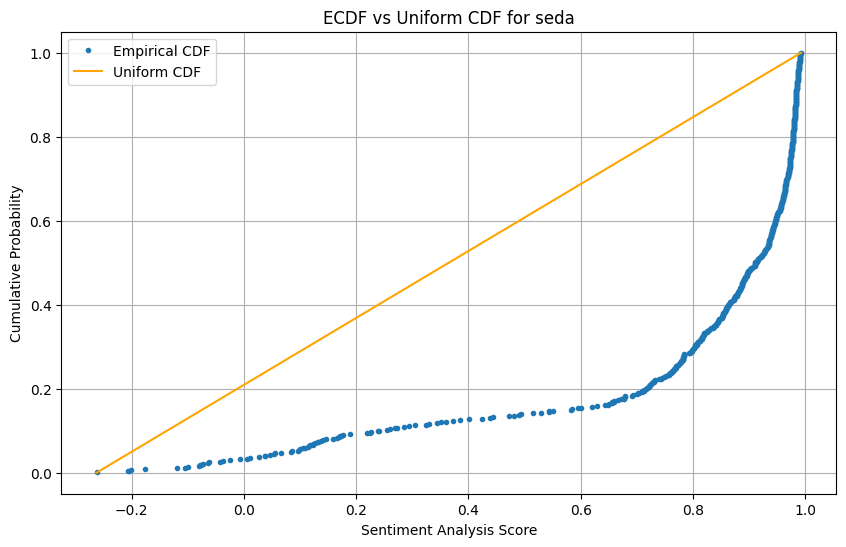

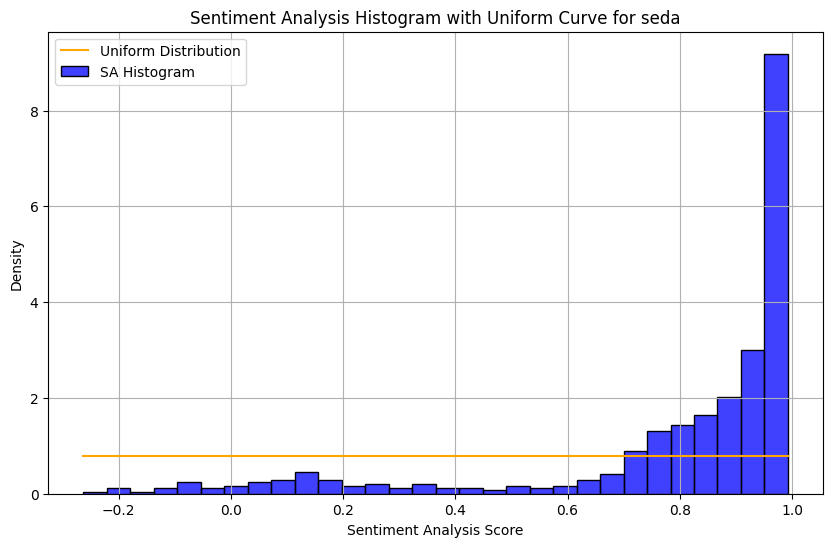

C:\Users\Predator\AppData\Local\Temp\ipykernel_34988\1382383916.py:21: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')


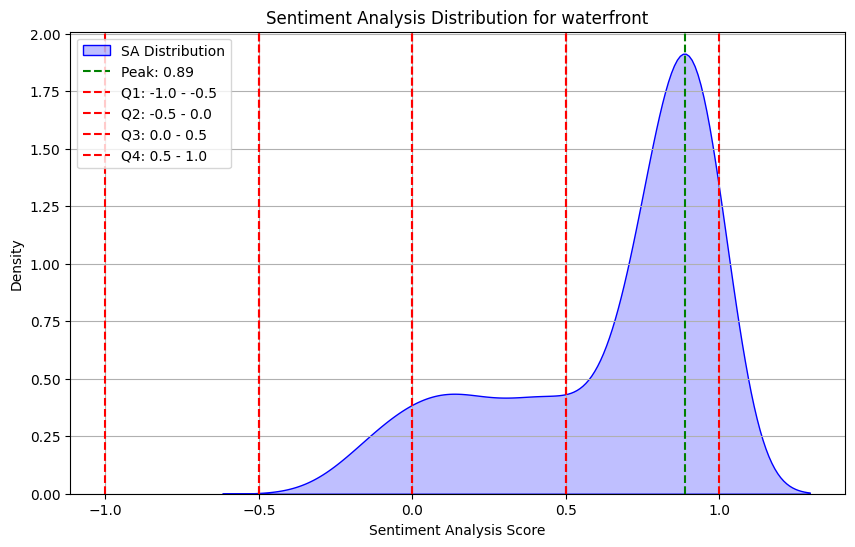

KS Statistic (Normal): 0.4316111009832853, P-value (Normal): 9.39765664831822e-81
KS Statistic (Uniform): 0.4045488056838881, P-value (Uniform): 1.3786178664200091e-70


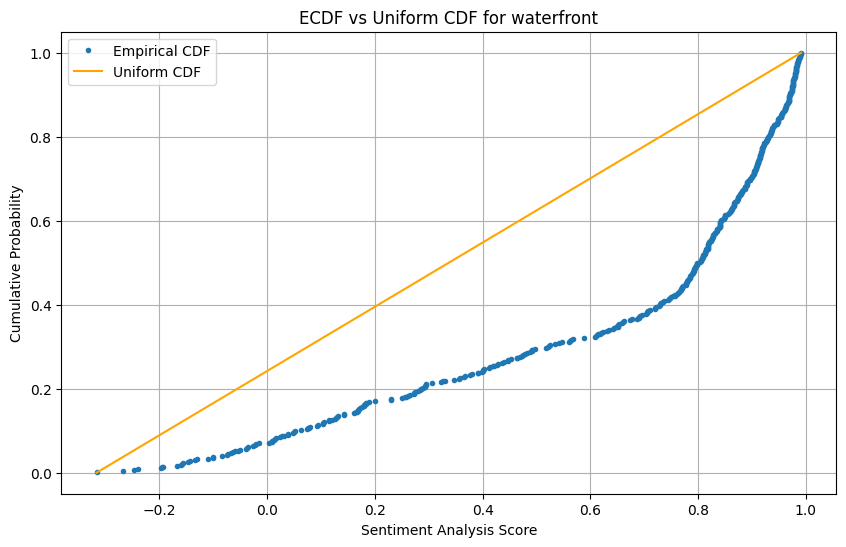

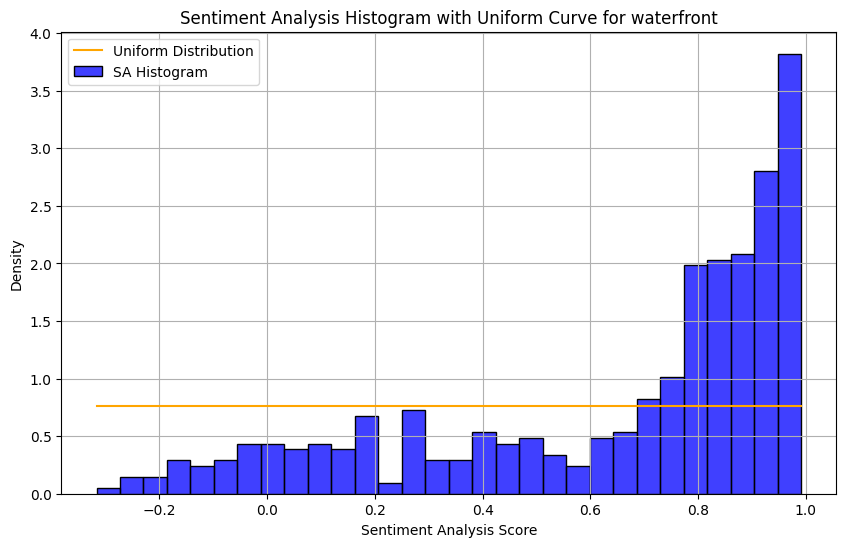

In [4]:
from scipy.stats import gaussian_kde, ks_1samp, norm, uniform
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import pandas as pd
import ast
import glob

# Function to compute the unified sentiment score from predicted probabilities
def calculate_sentiment_score(predicted_scores):
    # Parse the predicted_scores string into a list of floats
    scores = ast.literal_eval(predicted_scores)
    # Apply the weighted averaging formula: -1 * P(Negative) + 0 * P(Neutral) + 1 * P(Positive)
    sentiment_score = -1 * scores[0] + 0 * scores[1] + 1 * scores[2]
    return sentiment_score

# Define a function to plot KDE, peak, perform KS test, and visualize
def plot_sa_distribution_uniform(df, hotel_name):
    plt.figure(figsize=(10, 6))
    sns.kdeplot(df['SA'], shade=True, color='blue', label='SA Distribution')
    plt.title(f'Sentiment Analysis Distribution for {hotel_name}')
    plt.xlabel('Sentiment Analysis Score')
    plt.ylabel('Density')

    # Calculate KDE and find peak
    kde = gaussian_kde(df['SA'])
    density_values = kde(df['SA'])
    peak_value = df['SA'][density_values.argmax()]
    plt.axvline(x=peak_value, linestyle='--', color='green', label=f'Peak: {round(peak_value, 2)}')

    # Add quartile lines
    quartile_ranges = {'Q1': (-1.0, -0.5), 'Q2': (-0.5, 0.0), 'Q3': (0.0, 0.5), 'Q4': (0.5, 1.0)}
    for label, (start, end) in quartile_ranges.items():
        plt.axvline(x=start, linestyle='--', color='red', label=f'{label}: {start} - {end}')
        plt.axvline(x=end, linestyle='--', color='red')

    # Perform KS test against a normal distribution
    ks_statistic_norm, p_value_norm = ks_1samp(df['SA'], norm.cdf)
    plt.legend()
    plt.grid(True)
    plt.show()

    print(f"KS Statistic (Normal): {ks_statistic_norm}, P-value (Normal): {p_value_norm}")

    # Perform KS test against a uniform distribution
    ks_statistic_uniform, p_value_uniform = ks_1samp(df['SA'], uniform(loc=df['SA'].min(), scale=df['SA'].max() - df['SA'].min()).cdf)

    print(f"KS Statistic (Uniform): {ks_statistic_uniform}, P-value (Uniform): {p_value_uniform}")

    # Visualization of the KS test
    # 1. ECDF Plot
    plt.figure(figsize=(10, 6))
    ecdf = np.sort(df['SA'])
    cdf_uniform = uniform(loc=df['SA'].min(), scale=df['SA'].max() - df['SA'].min()).cdf(ecdf)
    plt.plot(ecdf, np.arange(1, len(ecdf) + 1) / len(ecdf), marker='.', linestyle='none', label='Empirical CDF')
    plt.plot(ecdf, cdf_uniform, label='Uniform CDF', color='orange')
    plt.title(f'ECDF vs Uniform CDF for {hotel_name}')
    plt.xlabel('Sentiment Analysis Score')
    plt.ylabel('Cumulative Probability')
    plt.legend()
    plt.grid(True)
    plt.show()

    # 2. Histogram with Uniform Curve
    plt.figure(figsize=(10, 6))
    sns.histplot(df['SA'], bins=30, kde=False, color='blue', label='SA Histogram', stat='density')
    x = np.linspace(df['SA'].min(), df['SA'].max(), 100)
    plt.plot(x, uniform.pdf(x, loc=df['SA'].min(), scale=df['SA'].max() - df['SA'].min()), color='orange', label='Uniform Distribution')
    plt.title(f'Sentiment Analysis Histogram with Uniform Curve for {hotel_name}')
    plt.xlabel('Sentiment Analysis Score')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    return peak_value

# Function to save the results
def save_results(hotel_name, peak_value):
    output_folder = "statistical_model_results"
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)
    
    # Create a file path for saving the results
    output_filename = os.path.join(output_folder, f"{hotel_name}_results.txt")

    # Determine which quartile the peak belongs to
    quartile_ranges = {'Q1': (-1.0, -0.5), 'Q2': (-0.5, 0.0), 'Q3': (0.0, 0.5), 'Q4': (0.5, 1.0)}
    peak_quartile = None
    for label, (start, end) in quartile_ranges.items():
        if start <= peak_value <= end:
            peak_quartile = label
            break

    # Open the file in write mode and save the results
    with open(output_filename, "w") as file:
        file.write(f"{hotel_name} Peak Value: {peak_value}\n")
        file.write(f"{hotel_name} Peak Quartile Classification: {peak_quartile}\n")

# Process multiple CSV files
input_folder = 'predictions_by_hotel'
csv_files = glob.glob(os.path.join(input_folder, '*.csv'))

for file_path in csv_files:
    # Extract hotel name from file name
    hotel_name = os.path.basename(file_path).split('_')[0]
    
    # Load the dataset
    df = pd.read_csv(file_path)
    
    # Add sentiment analysis scores
    df['SA'] = df['predicted_scores'].apply(calculate_sentiment_score)
    
    # Plot KDE, peak, and perform KS test for each hotel
    peak_value = plot_sa_distribution_uniform(df, hotel_name)
    
    # Save the results
    # save_results(hotel_name, peak_value)
